In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Superstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df = df.drop(["Country"]  , axis = 1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
new_df =  df.sort_values(by='Sales',ascending=False)

In [11]:
new_df.duplicated(subset=None, keep='first').sum()

0

In [12]:
import seaborn as sb
sb.set_style("whitegrid")

### Removing any outliers

In [13]:
new_df['z'] = (new_df.Sales-new_df.Sales.mean())/new_df.Sales.std()

In [14]:
new_df = new_df[new_df['z'] < 3]

In [15]:
new_df = new_df.drop(["z"]  , axis = 1)

In [16]:
new_df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Same Day,Corporate,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
4711,Same Day,Consumer,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
8658,Standard Class,Corporate,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376
9292,Same Day,Corporate,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452


### Density plots of Sales and Profit

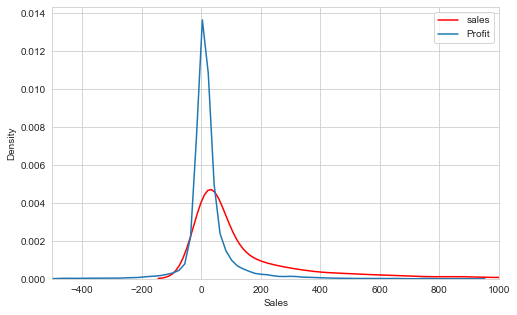

In [17]:
plt.figure(figsize = (8,5))
sb.kdeplot(new_df['Sales'] , color = 'red' , label = 'sales')
sb.kdeplot(new_df['Profit'] , label = 'Profit' )
plt.xlim([-500, 1000])
plt.legend()

In [18]:
new_df = new_df.drop(['Postal Code'] , axis = 1)

### correlation matrix

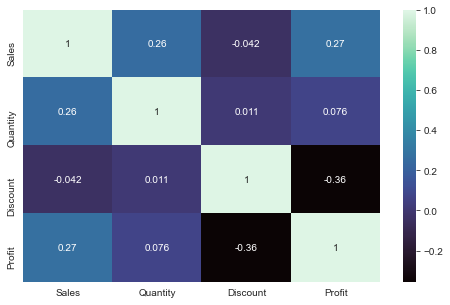

In [19]:
plt.figure(figsize = (8,5))
mp = sb.color_palette("mako", as_cmap=True)
sb.heatmap(new_df.corr(),annot=True , cmap = mp)

There seems to be having a positive corelation between Sales and Profit.

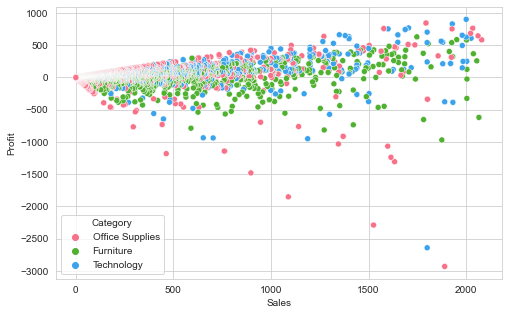

In [20]:
plt.figure(figsize = (8,5))
sb.scatterplot(data = new_df , x = 'Sales' , y = 'Profit' , hue = 'Category' , palette= 'husl' )

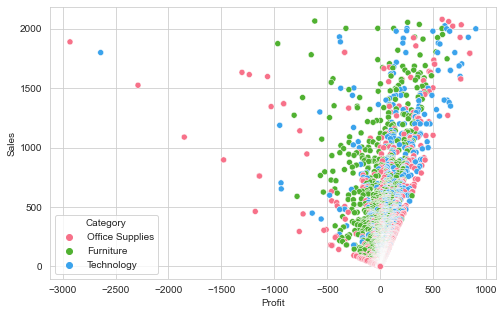

In [21]:
plt.figure(figsize = (8,5))
sb.scatterplot(data = new_df , x = 'Profit' , y = 'Sales' , hue = 'Category' , palette= 'husl')

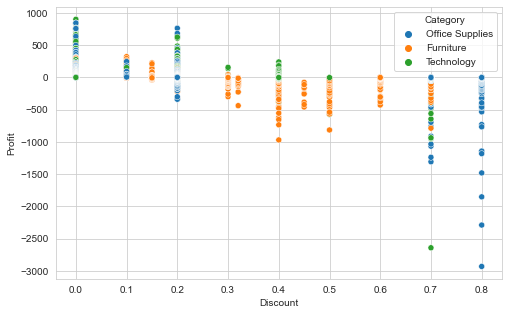

In [22]:
plt.figure(figsize = (8,5))
sb.scatterplot(data = new_df , x = 'Discount'  , y = 'Profit'  , hue = 'Category' )
plt.show()

### Countplots

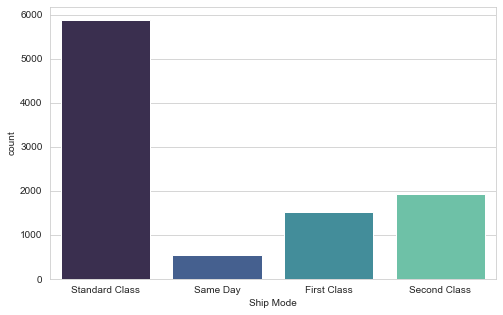

In [23]:
plt.figure(figsize = (8,5))
#sb.color_palette("mako", as_cmap=True)
sb.countplot(data = new_df , x = 'Ship Mode'  , palette= 'mako')
plt.show()

Standard class is the most preferred Shipment method.

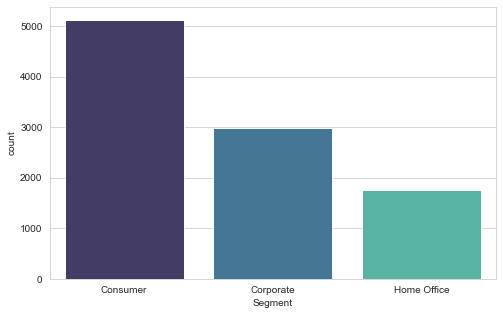

In [24]:
plt.figure(figsize = (8,5))
#sb.color_palette("mako", as_cmap=True)
sb.countplot(data = new_df , x = 'Segment'  , palette= 'mako' , order = new_df.Segment.value_counts().sort_values(ascending= False).index ) 
plt.show()

Individual consumers makes up the majority of the customers.

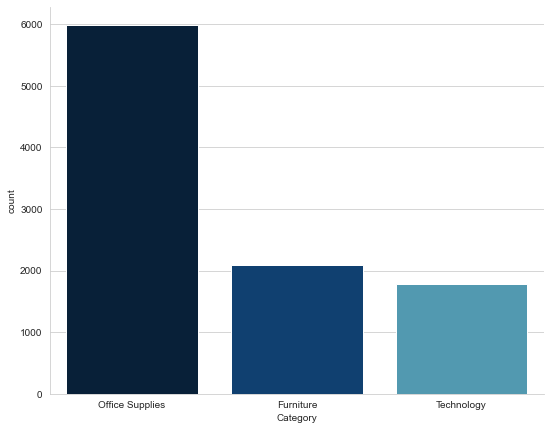

In [25]:
sb.catplot(x = 'Category', kind = 'count' , palette= 'ocean' , data = new_df)
plt.gcf().set_size_inches(8,6)
plt.show()

<Figure size 576x360 with 0 Axes>

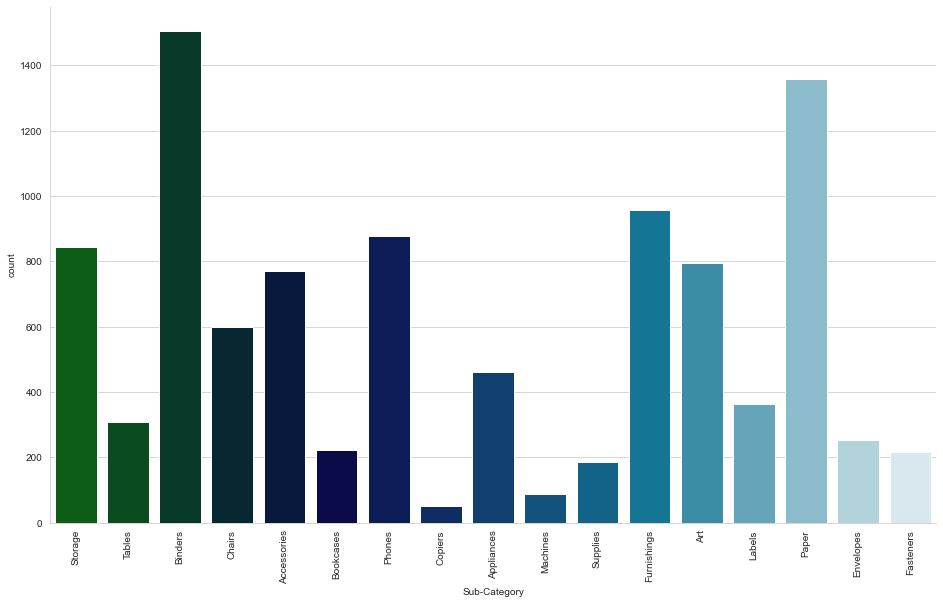

In [26]:
plt.figure(figsize=(8,5))
sb.catplot(x = 'Sub-Category', kind = 'count' , palette= 'ocean' , data = new_df)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(15,8)
plt.show()

In [27]:
y = list(new_df.City.value_counts())
x = list(new_df.City.value_counts().index)

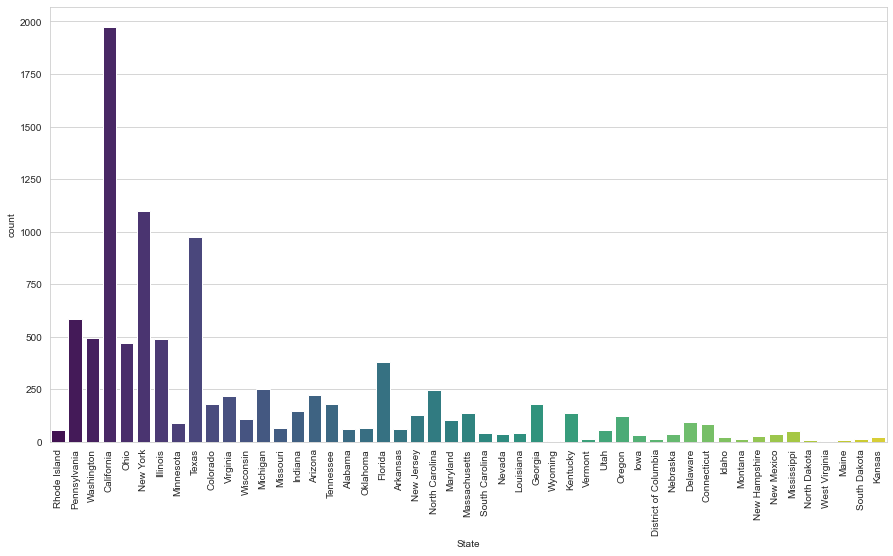

In [28]:
plt.figure(figsize=(10,6))
sb.color_palette("mako", as_cmap=True)
sb.countplot(x=new_df["State"] , palette= 'viridis')
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(15,8)
plt.show()

California City has highest in the number of orders

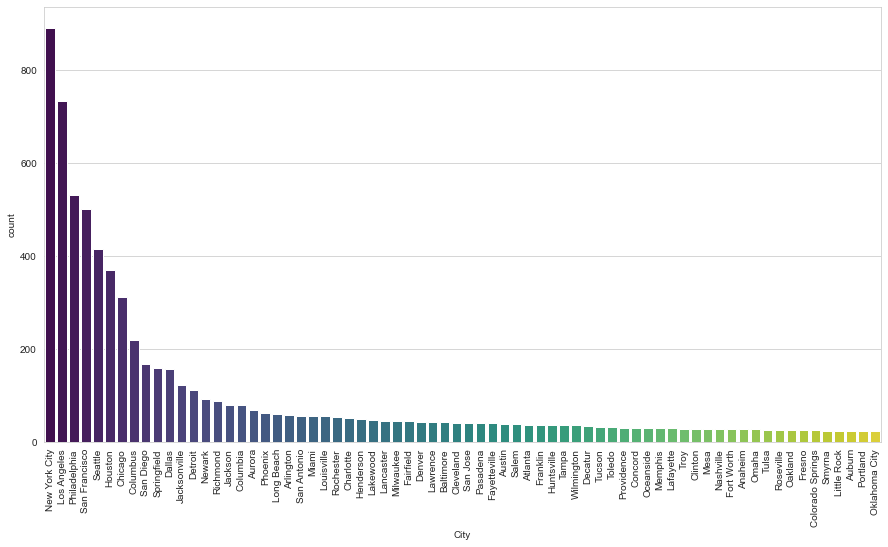

In [29]:

sb.color_palette("mako", as_cmap=True)
sb.countplot(x=new_df["City"],order=(new_df['City'].value_counts().head(70)).index , palette= 'viridis')
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(15,8)
plt.show()

In [30]:
grouped_df = new_df.groupby('City')

In [31]:
lst_city = ['New York City','Los Angeles', 'Philadelphia', 'San Francisco']
x = pd.DataFrame(grouped_df.get_group(lst_city[0]))

In [32]:
for i in range(1, len(lst_city)):
    x = pd.concat([x, grouped_df.get_group(lst_city[i])] , axis = 0)

<Figure size 1008x432 with 0 Axes>

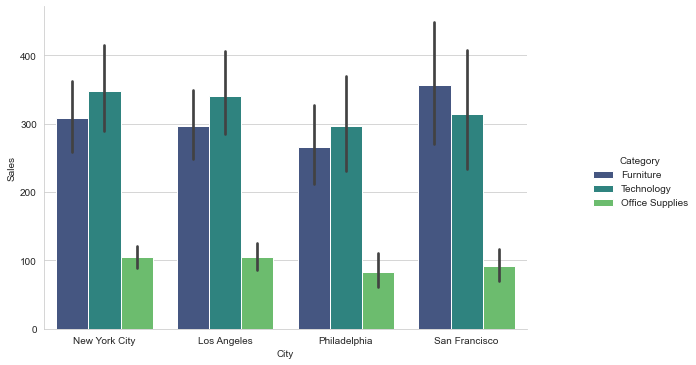

In [33]:
plt.figure(figsize=(14,6))
sb.catplot(data = x , x = 'City' , y = 'Sales' , hue = 'Category' , kind = 'bar' , palette= 'viridis')
plt.gcf().set_size_inches(10,5)
plt.show()

Technology items are very popular in top 4 states.

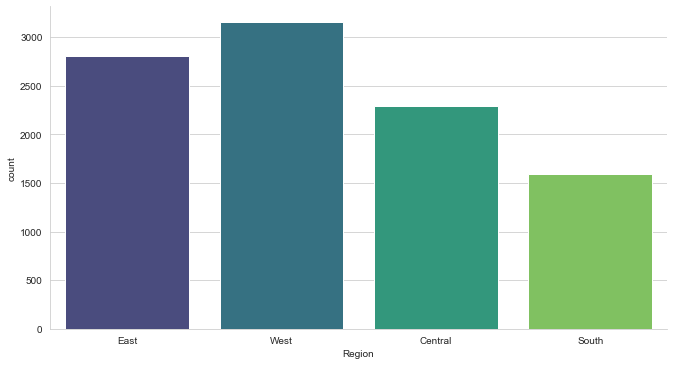

In [34]:
%matplotlib inline
sb.catplot(x = 'Region', kind = 'count' , palette= 'viridis' , data = new_df )
plt.gcf().set_size_inches(10,5)
plt.show()

West region has the highest number of sales

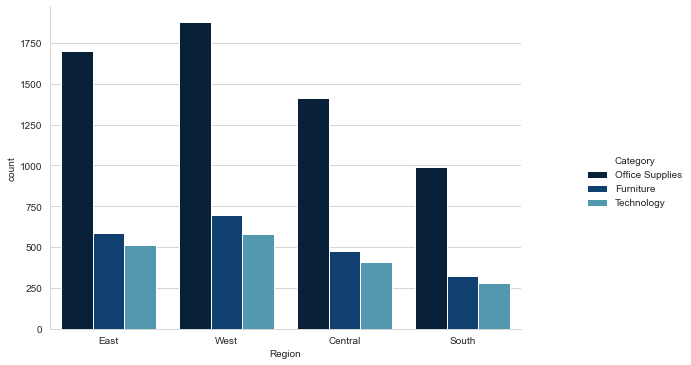

In [35]:
sb.catplot(x = 'Region', kind = 'count', hue = 'Category' , palette= 'ocean' , data = new_df)
plt.gcf().set_size_inches(10,5)
plt.show()

Office Supplies are the most ordered commodities in every region

In [36]:
new_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348


In [37]:
df1 = new_df.groupby(['Category'])['Sales','Profit'].sum().reset_index()
df1.head()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sales,Profit
0,Furniture,643351.3987,14180.5464
1,Office Supplies,594047.0720,90137.4134
2,Technology,543164.3200,86961.0770


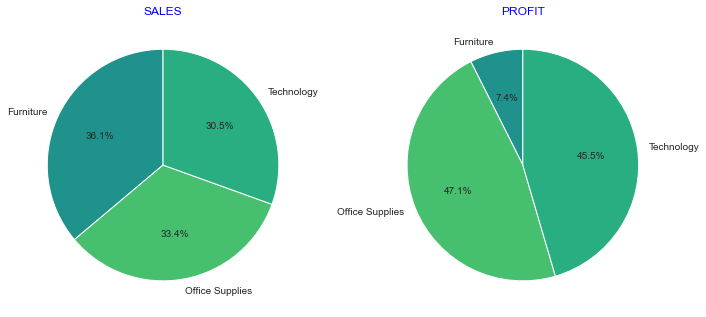

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("viridis")
outer_colors = cmap([130,180,160])
plt.gcf().set_size_inches(10,5)

ax1.pie(df1["Sales"], labels= df1.Category, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax1.set_title('SALES' , color = 'blue')
ax2.pie(df1["Profit"], labels= df1.Category, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax2.set_title('PROFIT' , color = 'blue')
fig.tight_layout()
plt.show()

Technology Category has the highest Profit to Sales ratio.

In [39]:
df2 = new_df.groupby(['Category'])['Profit' , 'Discount'].sum().reset_index()
df2.head()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Profit,Discount
0,Furniture,14180.5464,364.12
1,Office Supplies,90137.4134,943.20
2,Technology,86961.0770,235.40


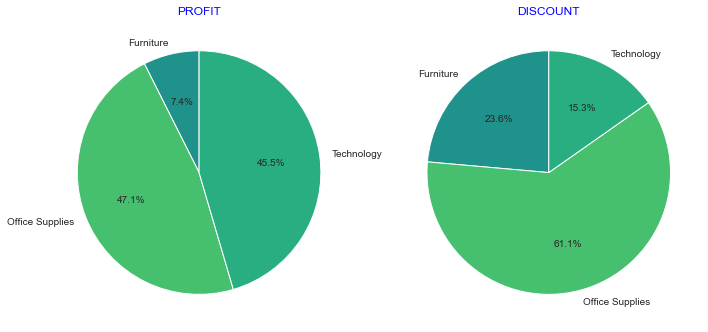

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("viridis")
outer_colors = cmap([130,180,160])
plt.gcf().set_size_inches(10,5)

ax1.pie(df2["Profit"], labels= df2.Category, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax1.set_title('PROFIT' , color = 'blue')
ax2.pie(df2["Discount"], labels= df2.Category, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax2.set_title('DISCOUNT' , color = 'blue')
fig.tight_layout()
plt.show()

Technology is the most profitable amone all the three categories. while Furniture is not able to provide profits even with the high discounts. the reson might be because people usually buy furniture less frequently and only when really needed as in comparision with technology products. 

In [41]:
df3 = new_df.groupby(['Region'])['Profit' , 'Discount'].sum().reset_index()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


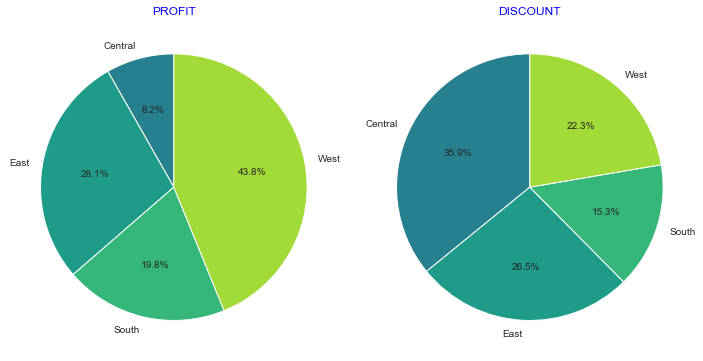

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("viridis")
outer_colors = cmap([110,140,170,220])
plt.gcf().set_size_inches(10,5)

ax1.pie(df3["Profit"], labels= df3.Region, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax1.set_title('PROFIT' , color = 'blue')
ax2.pie(df3["Discount"], labels= df3.Region, autopct='%1.1f%%',startangle=90 , colors = outer_colors)
ax2.set_title('DISCOUNT' , color = 'blue')
fig.tight_layout()
plt.show()

Central region is provided with the highest share of Discount while the profits from the same is the lowest.

In [46]:
profitable_cities = new_df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
profitable_cities.head(5)

,City,Profit
329,New York City,34874.4919
266,Los Angeles,24583.2187
452,Seattle,17546.8109
438,San Francisco,15637.1237
123,Detroit,6819.3475


New York is the most profitable city

In [47]:
not_profitable_cities = new_df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=True)
not_profitable_cities.head(5)

,City,Profit
374,Philadelphia,-11617.9326
207,Houston,-9666.0204
80,Chicago,-7865.3133
109,Dallas,-2846.5257
375,Phoenix,-2790.8832


Philadelphia is where we incurred most of the loss.